In [ ]:
#Regresion lineal simple 1
import pyreadstat
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("C:/Users/Santiago/Documents/Ciencia Politica/Metodología de la Opinión Pública Olego/Trabajo/Regresión lineal")
df_diputados, meta=pyreadstat.read_sav("BASEDATOS_ARGENTINA_122_ .sav")
dataframe= pd.DataFrame(df_diputados)

In [3]:
#Limpiamos el dataframe
dataframe= dataframe.drop(dataframe.index[dataframe.CLIMA201=="N.C."], axis=0) 
dataframe=dataframe.replace({"9.0":9,"Protección al medio ambiente (1)":1,"Desarrollo económico (10)":10,"Máxima regulación del Estado en la economía (1)":1})
pd.set_option('future.no_silent_downcasting', True)
dataframe= dataframe.loc[~((dataframe["CLIMA201"]==99)|(dataframe["EM101"]==99))]

C:\Users\Santiago\AppData\Local\Temp\ipykernel_32420\2540918743.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe=dataframe.replace({"9.0":9,"Protección al medio ambiente (1)":1,"Desarrollo económico (10)":10,"Máxima regulación del Estado en la economía (1)":1})


Text(0, 0.5, 'Priorización del desarrollo económico\n por sobre el medioambiente')

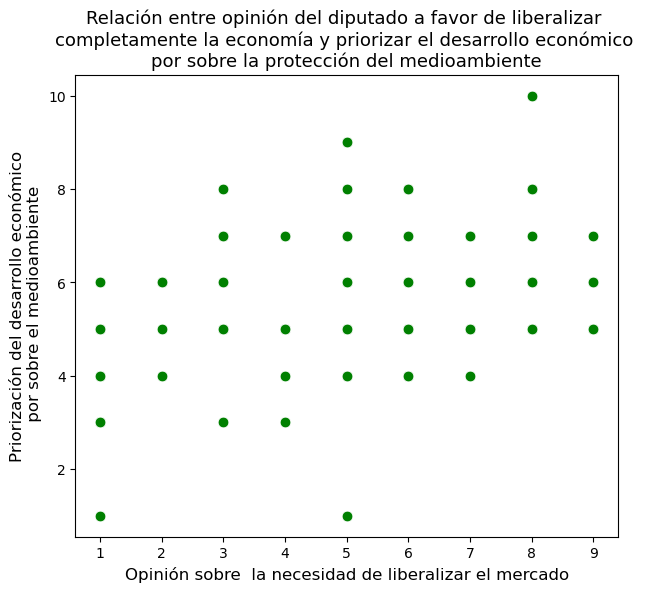

In [4]:
#Definimos las variables
variableX= "EM101" #Diyuntiva sobre modelos económicos de regulación: donde "1" es una economía regulada completamente por el Estado y "10" es la máxima liberalizaciónm del mercado
variableY= "CLIMA201" #Disyuntiva entre protección al medio ambiente y al desarrollo económico, donde "1" significa priorizar la protección al medioambiente y "10" al desarrollo económico

#Hacemos el gráfico de dispersión
plt.figure(figsize=(7,6))  #El gráfico tendrá un ancho de 7 pulgadas y una altura de 6 pulgadas
sns.scatterplot(data=dataframe, x=variableX, y=variableY, s=60, color= "green") 
plt.title ("Relación entre opinión del diputado a favor de liberalizar \ncompletamente la economía y priorizar el desarrollo económico \npor sobre la protección del medioambiente", fontsize= 13) #Personalizamos el gráfico
plt.xlabel("Opinión sobre  la necesidad de liberalizar el mercado", fontsize= 12)
plt.ylabel("Priorización del desarrollo económico\n por sobre el medioambiente", fontsize= 12)

In [5]:
#Calculamos la correlación de Pearson entre ambas variables
correlacionPearson= dataframe[variableX].corr(dataframe[variableY])
print(f' Correlación de Pearson entre ambas variables: {correlacionPearson:.2f}') #:.2f formatea el valor de la correlación a dos decimales.

#Ajustamos el modelo de regresión lineal
x_simple= sm.add_constant(dataframe[variableX]) 
y_simple= dataframe[variableY]
modelosimple= sm.OLS(y_simple,x_simple).fit()
print(modelosimple.summary())

 Correlación de Pearson entre ambas variables: 0.35
                            OLS Regression Results                            
Dep. Variable:               CLIMA201   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     15.46
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           0.000149
Time:                        18:53:36   Log-Likelihood:                -191.04
No. Observations:                 110   AIC:                             386.1
Df Residuals:                     108   BIC:                             391.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


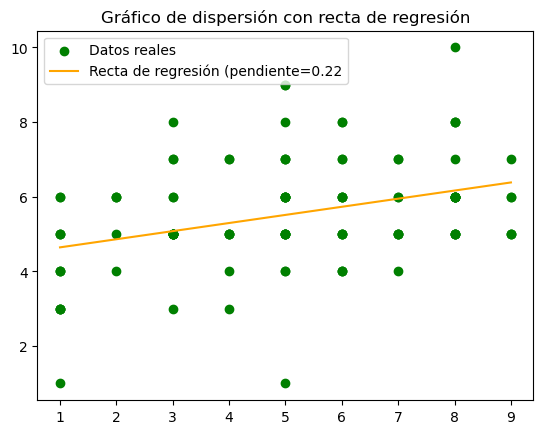

In [6]:
#Generamos el gráfico de regresión
plt.scatter(dataframe[variableX], dataframe[variableY], label= "Datos reales", color= "green")
intercepto, pendiente= modelosimple.params 
valoresx= np.linspace(dataframe[variableX].min(), dataframe[variableX].max(), 100) 
valoresy= intercepto+pendiente*valoresx #Beta0 + Beta1 * X (Es la ecuación de la regresión lineal)
plt.plot(valoresx,valoresy, color="orange", label = f'Recta de regresión (pendiente={pendiente:.2f}') #Personalizamos el gráfico
plt.xlabel= ("Opinión sobre  la necesidad de liberalizar el mercado")
plt.ylabel= ("Priorización del desarrollo económico\n por sobre el medioambiente")
plt.title ("Gráfico de dispersión con recta de regresión")
plt.legend()
plt.show()

CONCLUSIONES: Una Correlación de Pearson de 0.35 entre las variables indica que existe una relación postiva entre ambas pero que aquella no es muy fuerte. 
A su vez, el R cuadrado de 0.125 también nos enseña que la relación entre las variables es débil, o que sólo un 12,5% de la variable dependiente se puede explicar por la variable independiente.
Beta cero (también entendida como la ordenada al origen o la constante) es de 4.43 mientras que Beta 1 (es decir, cuánto cambia la variable Y ante un cambio de una unidad en la variable X) es 0.22. De esta forma, entendemos que existe una pendiente positiva.
El nivel de confianza del modelo es del 100% ya que el P valor es del 0.000, considerando que las ciencias sociales aceptan que tome hasta un 0.05 (o, dicho de otra forma, aceptan un 95% de confiabilidad).

In [7]:
#Regresion lineal simple 2

dataframe= pd.DataFrame(df_diputados)

#Limpiamos el dataframe 
dataframe=dataframe.replace({"Es un problema muy importante(10)": 10, "Muy negativo(1)": 1, "Muy positivo(10)":10,"9.0": 9})

#Definimos las variables 
var_x= "FFAA101" #Imagen de las FFAA argentinas en la actualidad donde 10 es muy positivo y 1 muy negativo
var_y= "PRO102" #Pregunta si la inseguridad ciudadana y la delincuencia son un problema donde 10 es un problema muy importante y 1 no es un problema importante


(0.0, 10.0)

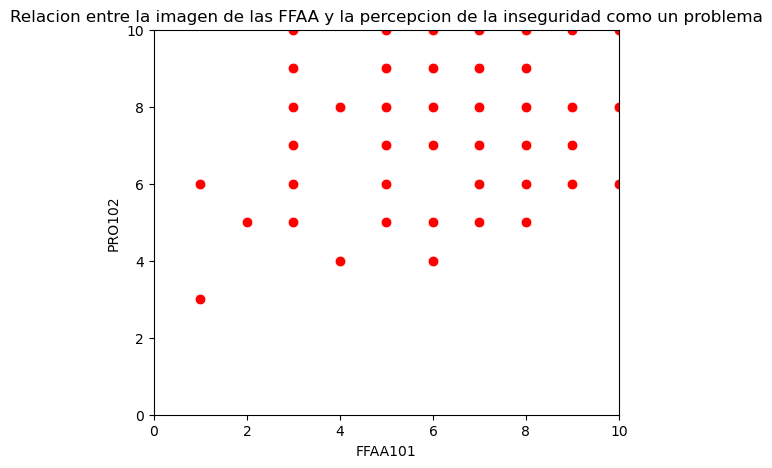

In [8]:
#Hacemos el grafico de dispersion 
plt.figure(figsize=(6,5))  
sns.scatterplot(data=dataframe, x=var_x, y=var_y, s=60, color= "red")
plt.title("Relacion entre la imagen de las FFAA y la percepcion de la inseguridad como un problema", fontsize= 12)
#plt.ylabel("Percepcion de la inseguridad y delincuencia", fontsize= 11)
#plt.xlabel("Imagen de las FFAA argentinas", fontsize= 11)
plt.ylim(0, 10)  #Limitar el eje Y a 0-10
plt.xlim(0, 10)  #Limitar el eje X a 0-10


In [9]:
#Calculamos la correlación de Pearson entre ambas variables
CorrPearson= dataframe[var_x].corr(dataframe[var_y])
print(f' Correlación de Pearson entre ambas variables: {CorrPearson:.2f}') #Pasa la correlacion a dos decimales

 Correlación de Pearson entre ambas variables: 0.22


In [10]:
#Modelo de regresión lineal
x_regli= sm.add_constant(dataframe[var_x]) 
y_regli= dataframe[var_y]
modeloregli= sm.OLS(y_regli,x_regli).fit()
print(modeloregli.summary())

#Ajustamos el modelo de regresión lineal
x_simp= sm.add_constant(dataframe[var_x]) 
y_simp= dataframe[var_y]
modelosimple= sm.OLS(y_simp,x_simp).fit()
print(modelosimple.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRO102   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.571
Date:                Mon, 28 Oct 2024   Prob (F-statistic):             0.0200
Time:                        18:53:37   Log-Likelihood:                -209.22
No. Observations:                 111   AIC:                             422.4
Df Residuals:                     109   BIC:                             427.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7645      0.512     13.203      0.0

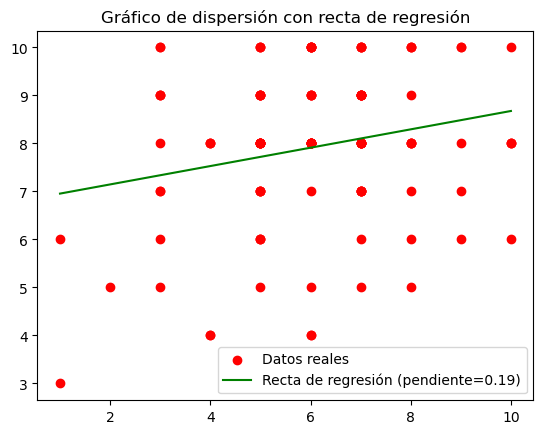

In [11]:
#Generamos el gráfico de regresión
plt.scatter(dataframe[var_x], dataframe[var_y], label= "Datos reales", color= "red")
intercepto, pendiente= modelosimple.params 
valx= np.linspace(dataframe[var_x].min(), dataframe[var_x].max(), 100) 
valy= intercepto+pendiente*valx #Beta0 + Beta1 * X (Es la ecuación de la regresión lineal)
plt.plot(valx,valy, color="green", label = f'Recta de regresión (pendiente={pendiente:.2f})') #Personalizamos el gráfico
plt.xlabel= ("Imagen de las FFAA argentinas")
plt.ylabel= ("Percepcion de la inseguridad y la delincuencia")
plt.title ("Gráfico de dispersión con recta de regresión")
plt.legend()
plt.show()

La correlación de Pearson entre ambas variables es de 0.22 lo que indica una correlacion positiva debil, es decir a medida que aumenta la percepcion de la delincuencia y la inseguridad como un problema, tambien tiende a aumentar levemente la imagen de las FFAA. 
El valor de R cuadrado es de 0.049, al ser un valor cercano a 0 lo que muestra es que el modelo es debil. 
El P valor es el nivel de confianza del modelo, al ser 0.000 significa que es de 100%
Beta cero (ordenada al origen) es 6,7645 y beta 1 (cuanto se modifica Y por cada modificacion de X) es 0,1912. Entendemos que existe una leve tendencia positiva, ya que por cada modificacion de Y, X se modifica en 0,1912.


In [12]:
#Regresión lineal 3
df_diputados=df_diputados.loc[~((df_diputados['ACT104']==98)|(df_diputados['ACT104']==99))]
print(df_diputados['ACT104'].unique())
print(df_diputados['ACT104'].dtype)

[3. 2. 1. 8. 4. 7. 5. 6.]
float64


In [13]:
df_diputados=df_diputados.loc[~((df_diputados['MED103']==98)|(df_diputados['MED103']==99))]
print(df_diputados['MED103'].unique())
print(df_diputados['MED103'].dtype)

[2. 1. 6. 8. 4. 5. 3.]
float64


Correlación de Pearson:0.4663814819007905


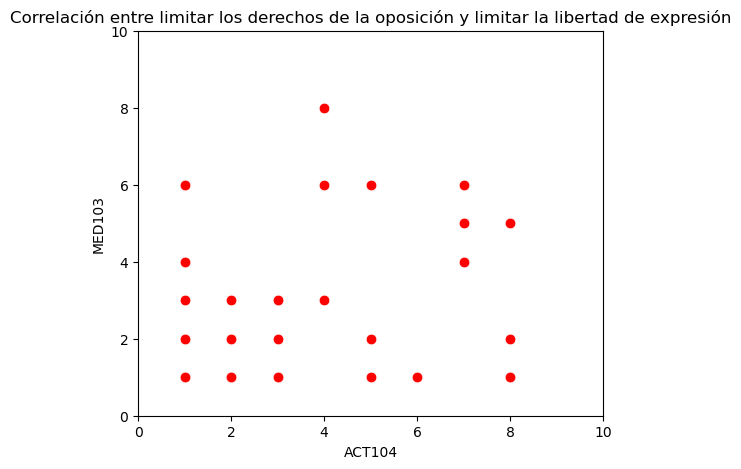

In [14]:
X=df_diputados['ACT104']
Y=df_diputados['MED103']
CorrPearson= df_diputados['ACT104'].corr(df_diputados['MED103'])
plt.figure(figsize=(6,5))  
sns.scatterplot(data=df_diputados, x=X, y=Y, s=60, color= "red")
plt.title("Correlación entre limitar los derechos de la oposición y limitar la libertad de expresión", fontsize=12)
#plt.xlabel("Limitar los derechos de la oposición")
#plt.ylabel("Limitar la libertad de expresión")
plt.ylim(0, 10)  #Limitar el eje Y a 0-10
plt.xlim(0, 10)  #Limitar el eje X a 0-10
print(f"Correlación de Pearson:{CorrPearson}")

In [15]:
X = sm.add_constant(X)
modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 MED103   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     30.30
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.48e-07
Time:                        18:53:38   Log-Likelihood:                -184.32
No. Observations:                 111   AIC:                             372.6
Df Residuals:                     109   BIC:                             378.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9614      0.179      5.363      0.0

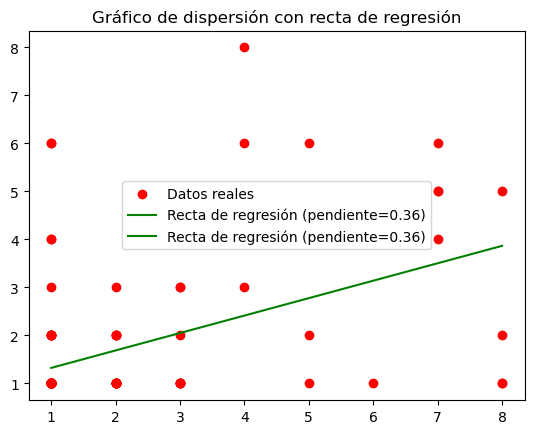

In [16]:
plt.scatter(df_diputados['ACT104'], Y, label= "Datos reales", color= "red")
intercepto, pendiente= modelo.params 
valx= np.linspace(X.min(), X.max(), 100) 
valy= intercepto+pendiente*valx
plt.plot(valx,valy, color="green", label = f'Recta de regresión (pendiente={pendiente:.2f})') 
plt.xlabel= ("Limitar los derechos de la oposición")
plt.ylabel= ("Limitar la libertad de expresión")
plt.title ("Gráfico de dispersión con recta de regresión")
plt.legend()
plt.show()


El R de Pearson fue de 0,46, un valor entre bajo y medio. El valor de R cuadrado fue de 0,218. El P valor es de 0, por lo tanto la confianza es del 100%. 